# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#https://stackoverflow.com/questions/52638844/modulenotfounderror-no-module-named-citipy-error
#to install pip on windows
#https://stackoverflow.com/questions/31172719/pip-install-access-denied-on-windows
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

#about city py 
#https://github.com/wingchen/citipy
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
#https://restcountries.eu/#api-endpoints-full-name
#https://restcountries.eu/rest/v2/alpha/IN
lat_lngs = []
cities = []
ls_cities_countries = []
# weather_data = {
#     "city":"",
#     "country":"",
#     "lat":"",
#     "lon":"",
#     "temperature":"",
#     "humidity":"",
#     "coludiness":"",
#     "wind_speed":""    
# }

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=6000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=6000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_country = []
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name    
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    try:
        country_name = requests.get("https://restcountries.eu/rest/v2/alpha/"+country).json()["name"]
    except:
        print("Country not found")
    city_country.append(city)
    city_country.append(country_name)
    city_country.append(lat_lng[0])
    city_country.append(lat_lng[1])
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        ls_cities_countries.append(city_country)

# Print the city count to confirm sufficient count
type(cities)
# print(api_key)

lst_weather_data = []
for city in ls_cities_countries:
    dict_weather_data = {}
    dict_weather_data["city"] = city[0]
    dict_weather_data["county"] = city[1]
    dict_weather_data["lat"] = city[2]
    dict_weather_data["lon"] = city[3]
    lst_weather_data.append(dict_weather_data)



Country not found


In [3]:
df_weather_data = pd.DataFrame(lst_weather_data)

In [4]:
df_weather_data.head(4)
# df_weather_data["county"].nunique()

,city,county,lat,lon
0,albany,Australia,-59.950639,116.755627
1,punta arenas,Chile,-65.150700,-110.908474
2,nanortalik,Greenland,53.078565,-36.401235
3,georgetown,"Saint Helena, Ascension and Tristan da Cunha",-16.684453,-22.561589


In [5]:
# type(df_weather_data.loc[:,"county"])

In [6]:
# type(df_weather_data.loc[:,["county"]])

In [7]:
# for i, j in (df_weather_data.head(2).iterrows()):
# #     print(i)
#     print(j.city)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/

df_weather_data["temperature"] = ""
df_weather_data["humidity"] = ""
df_weather_data["coludiness"] = ""
df_weather_data["wind_speed"] = ""


#(0K − 273.15) × 9/5 + 32
# base_url variable to store url 
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# for city in df_weather_data.loc[:,"city"]:
for index, row in (df_weather_data.iterrows()):
    
    city = row.city
    country = row.county
    complete_url = base_url + "APPID=" + api_key + "&q=" + city +"," + country
#     print(complete_url)
    response = requests.get(complete_url)    
    data = response.json()
    try:
      temp_in_f = (data["main"]["temp_max"] - 273.15) * (9/5)+32
                   
      df_weather_data.loc[df_weather_data["city"] == city,["temperature"]] = str(int(temp_in_f))
              
      df_weather_data.loc[df_weather_data["city"] == city,["humidity"]] = str(data["main"]["humidity"])
          
      df_weather_data.loc[df_weather_data["city"] == city,["coludiness"]] = str(data["clouds"]["all"])
          
      df_weather_data.loc[df_weather_data["city"] == city,["wind_speed"]] = str(data["wind"]["speed"])
    
    except:
      pass


In [11]:
df_weather_data_bkp = df_weather_data
df_weather_data.head(3)

,city,county,lat,lon,temperature,humidity,coludiness,wind_speed
0,albany,Australia,-59.950639,116.755627,64,87,90,6.2
1,punta arenas,Chile,-65.150700,-110.908474,46,61,0,12.3
2,nanortalik,Greenland,53.078565,-36.401235,39,81,0,0.83


In [12]:
# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

df_weather_data.drop(df_weather_data.loc[df_weather_data["temperature"] == "",:].index, inplace=True)

df_weather_data["temperature"] = df_weather_data["temperature"].astype(int)
df_weather_data["humidity"] = df_weather_data["humidity"].astype(int)
df_weather_data["coludiness"] = df_weather_data["coludiness"].astype(int)
df_weather_data["wind_speed"] = df_weather_data["wind_speed"].astype(float)

df_weather_data.drop(df_weather_data.loc[df_weather_data["humidity"] > 100,:].index, inplace=True)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
df_weather_data.count()
df_weather_data.to_csv("D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/weather_api_data.csv", index=False)

In [24]:
df_weather_data.loc[:,["city"]].to_csv("D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/weather_api_city_data.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature (10/06/2019)')

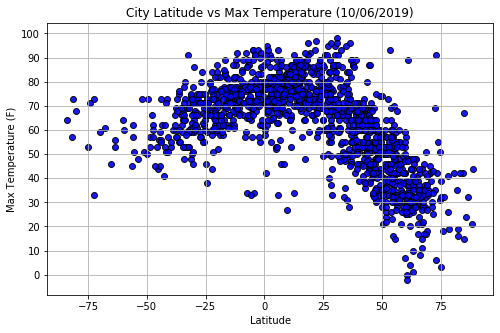

In [14]:
#City Latitude vs Max Temperature 
plt.figure(figsize=(8,5))
plt.grid()
plt.yticks(np.arange(0, 120, step=10))
plt.scatter(df_weather_data["lat"]
            , df_weather_data["temperature"]
            , marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# plt.legend(loc="upper left")
plt.title("City Latitude vs Max Temperature (10/06/2019)")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs Humidity (10/06/2019)')

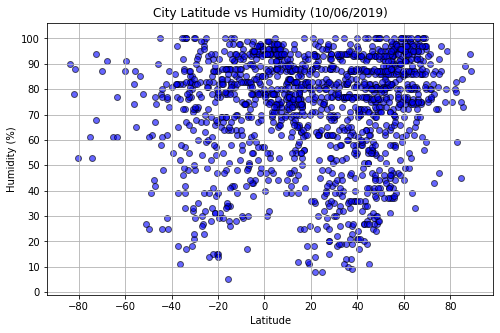

In [15]:
#City Latitude vs Humidity
plt.figure(figsize=(8,5))
plt.grid()
plt.yticks(np.arange(0, 120, step=10))
plt.xticks(np.arange(-80, 100, step=20))
plt.scatter(df_weather_data["lat"]
            , df_weather_data["humidity"]
            , marker="o", facecolors="blue", edgecolors="black", alpha=0.60)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (10/06/2019)")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness Plot (10/06/2019)')

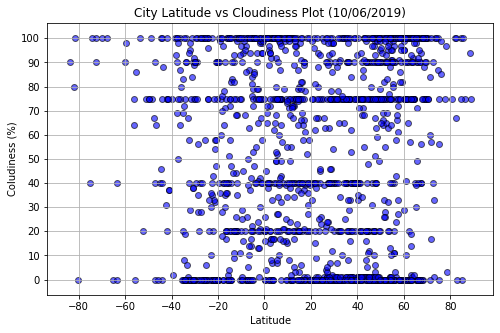

In [16]:
#City Latitude vs Cloudiness 
plt.figure(figsize=(8,5))
plt.grid()
plt.yticks(np.arange(0, 120, step=10))
plt.xticks(np.arange(-80, 100, step=20))
plt.scatter(df_weather_data["lat"]
            , df_weather_data["coludiness"]
            , marker="o", facecolors="blue", edgecolors="black", alpha=0.60)

plt.xlabel("Latitude")
plt.ylabel("Coludiness (%)")
plt.title("City Latitude vs Cloudiness Plot (10/06/2019)")
plt.savefig('D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/City_Latitude_Vs_Coludi.png')

#### Latitude vs. Wind Speed Plot

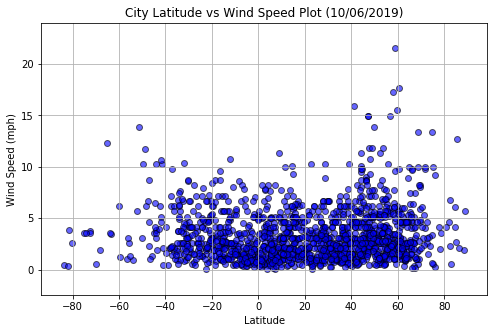

In [25]:
#City Latitude vs WindSpeed 
plt.figure(figsize=(8,5))
plt.grid()
plt.yticks(np.arange(0, 120, step=5))
plt.xticks(np.arange(-80, 100, step=20))
plt.scatter(df_weather_data["lat"]
            , df_weather_data["wind_speed"]
            , marker="o", facecolors="blue", edgecolors="black", alpha=0.60)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed Plot (10/06/2019)")
plt.savefig('D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/City_Latitude_Vs_WindSpeed.png')